In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
data = pd.read_csv("final_merge.csv", encoding = "euc-kr")

In [5]:
data.head()

,Unnamed: 0,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,...,confirmed,released,deceased,YYMM,festival_count,rain_day,sex_age_population,screen_num,total_tourist,total_sale_by_indst
0,1,강원,건강보조식품 소매업,강원,20s,1,1,13,843100.0,16,...,0,0,0,2019-11-01,0,9.1,100115,28,1.808904e+06,33849.0
1,2,강원,건강보조식품 소매업,강원,20s,1,1,3,139000.0,3,...,0,0,0,2019-06-01,8,10.6,100115,28,1.374767e+06,33849.0
2,3,강원,건강보조식품 소매업,강원,20s,1,1,3,27500.0,3,...,0,0,0,2019-08-01,8,13.9,100115,28,1.603895e+06,33849.0
3,4,강원,건강보조식품 소매업,강원,20s,1,1,3,395500.0,3,...,0,0,0,2019-09-01,11,9.8,100115,28,2.062151e+06,33849.0
4,5,강원,건강보조식품 소매업,강원,20s,1,1,3,427510.0,2,...,29,23,1,2020-03-01,0,7.3,100115,28,NaN,33849.0


In [54]:
sales = data["total_sale_by_indst"]

In [7]:
sales

0          33849.0
1          33849.0
2          33849.0
3          33849.0
4          33849.0
            ...   
1057389    50447.0
1057390    50447.0
1057391    50447.0
1057392    50447.0
1057393    50447.0
Name: total_sale_by_indst, Length: 1057394, dtype: float64

In [8]:
len(sales.unique())

595

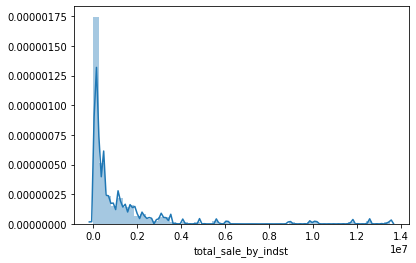

In [9]:
sns.distplot(sales)

In [15]:
nona_sales = sales[~sales.isna()]

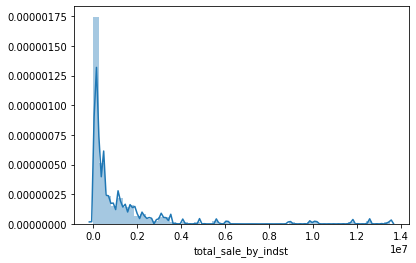

In [16]:
sns.distplot(nona_sales)

In [17]:
sum(nona_sales)

1125649935420.763

In [18]:
div_sales = nona_sales/sum(nona_sales)

In [19]:
div_sales

0          3.007063e-08
1          3.007063e-08
2          3.007063e-08
3          3.007063e-08
4          3.007063e-08
               ...     
1057389    4.481589e-08
1057390    4.481589e-08
1057391    4.481589e-08
1057392    4.481589e-08
1057393    4.481589e-08
Name: total_sale_by_indst, Length: 1040016, dtype: float64

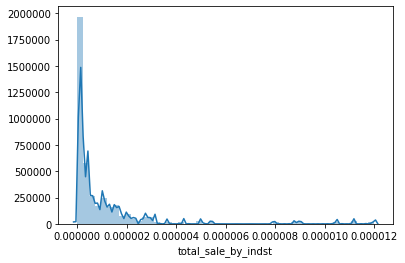

In [20]:
sns.distplot(div_sales)

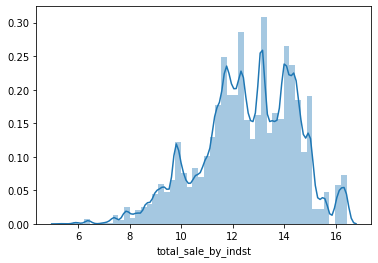

In [21]:
sns.distplot(np.log(sales))

In [52]:
log_sales = np.log(sales)

In [84]:
sales = data["total_sale_by_indst"]

In [85]:
log_sales = np.log(sales)

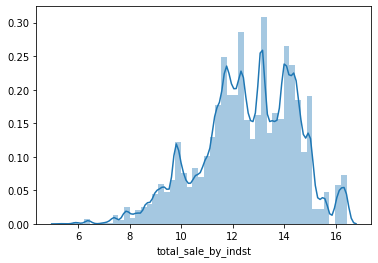

In [86]:
sns.distplot(log_sales)

In [87]:
cat_sales = pd.qcut(log_sales, q = 10, labels = [1,2,3,4,5,6,7,8,9,10])

In [88]:
cat_sales

0          2
1          2
2          2
3          2
4          2
          ..
1057389    2
1057390    2
1057391    2
1057392    2
1057393    2
Name: total_sale_by_indst, Length: 1057394, dtype: category
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]

In [89]:
sum(cat_sales.isna())

17378

In [102]:
for i in range(10):
    sales[cat_sales == i+1] = np.round(np.mean(sales[cat_sales == i+1]),3)

/Users/jominju/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [107]:
log_sales.unique()

array([10.591, 12.425, 11.482,  9.074, 13.47 , 12.992,    nan, 11.944,
       14.486, 14.035, 15.452])

In [105]:
for i in range(10):
    log_sales[cat_sales == i+1] = np.round(np.mean(log_sales[cat_sales == i+1]),3)

In [79]:
sales.unique()

array([  62829.14498009,  238298.83997521,  131738.91649892,
         13397.50623727,  914437.90757352,  461526.09985049,
                    nan, 1655125.03308125, 5299259.11654302])

In [93]:
log_sales.unique()

array([10.59054219, 12.42456906, 11.48156527,  9.07350527, 13.46951887,
       12.99164715,         nan, 11.94437632, 14.48616585, 14.0354548 ,
       15.45162056])

In [104]:
sales.unique()

array([  42767.077,  251207.511,   98196.393,   10972.309,  721585.993,
        442858.791,         nan,  155366.044, 1976481.108, 1253926.239,
       6057876.648])

In [106]:
np.log(sales.unique())

array([10.66352386, 12.43403461, 11.49472476,  9.30313001, 13.48920684,
       13.00100624,         nan, 11.95353919, 14.4968286 , 14.04179018,
       15.61686991])

In [142]:
in_data = data[["CARD_SIDO_NM","STD_CLSS_NM","total_sale_by_indst"]]

In [115]:
log_indst_data = indst_data.copy()

In [116]:
log_indst_data["total_sale_by_indst"] = log_sales

In [139]:
indst_data["total_sale_by_indst"] = sales

/Users/jominju/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [118]:
log_indst_data.head()

,CARD_SIDO_NM,STD_CLSS_NM,total_sale_by_indst
0,강원,건강보조식품 소매업,10.591
1,강원,건강보조식품 소매업,10.591
2,강원,건강보조식품 소매업,10.591
3,강원,건강보조식품 소매업,10.591
4,강원,건강보조식품 소매업,10.591


In [119]:
indst_data.head()

,CARD_SIDO_NM,STD_CLSS_NM,total_sale_by_indst
0,강원,건강보조식품 소매업,42767.077
1,강원,건강보조식품 소매업,42767.077
2,강원,건강보조식품 소매업,42767.077
3,강원,건강보조식품 소매업,42767.077
4,강원,건강보조식품 소매업,42767.077


In [120]:
log_indst_data.to_csv("log_indst_data.csv")

In [121]:
indst_data.to_csv("indst_data.csv")

In [143]:
in_data = data[["CARD_SIDO_NM","STD_CLSS_NM","total_sale_by_indst","AMT"]]

In [144]:
in_data["total_sale_by_indst"] = sales

/Users/jominju/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/Users/jominju/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jominju/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jominju/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jominju/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jominju/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jominju/opt/anaconda3/lib/python3.7/site-package

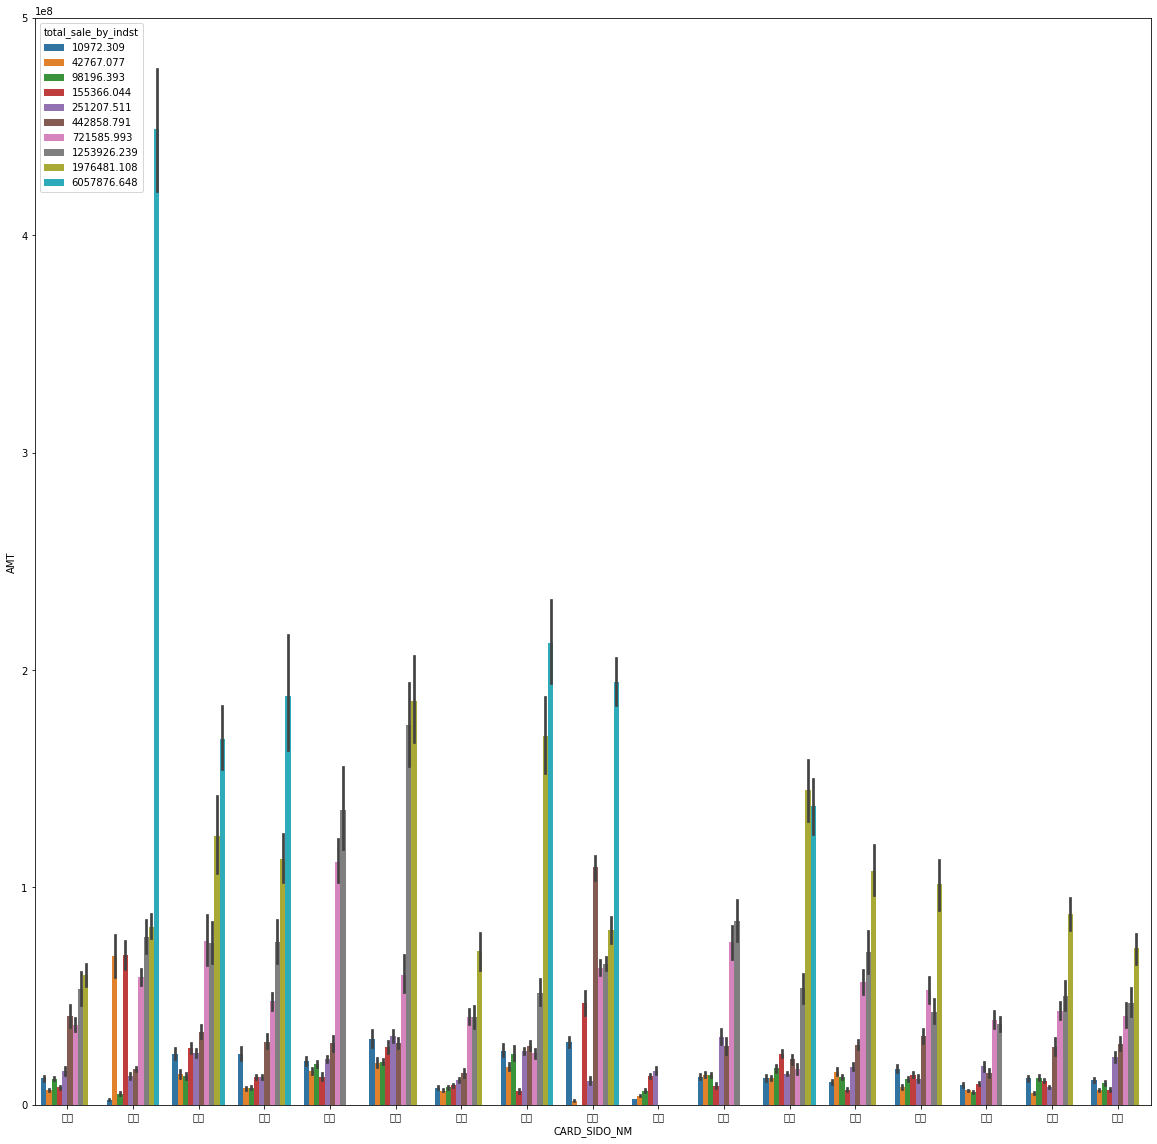

In [133]:
plt.figure(figsize = (20, 20))
sns.barplot(x = in_data["CARD_SIDO_NM"], y = in_data["AMT"], hue = in_data["total_sale_by_indst"])

In [134]:
in_data["total_sale_by_indst"] = log_sales

/Users/jominju/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/Users/jominju/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jominju/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jominju/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jominju/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jominju/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jominju/opt/anaconda3/lib/python3.7/site-package

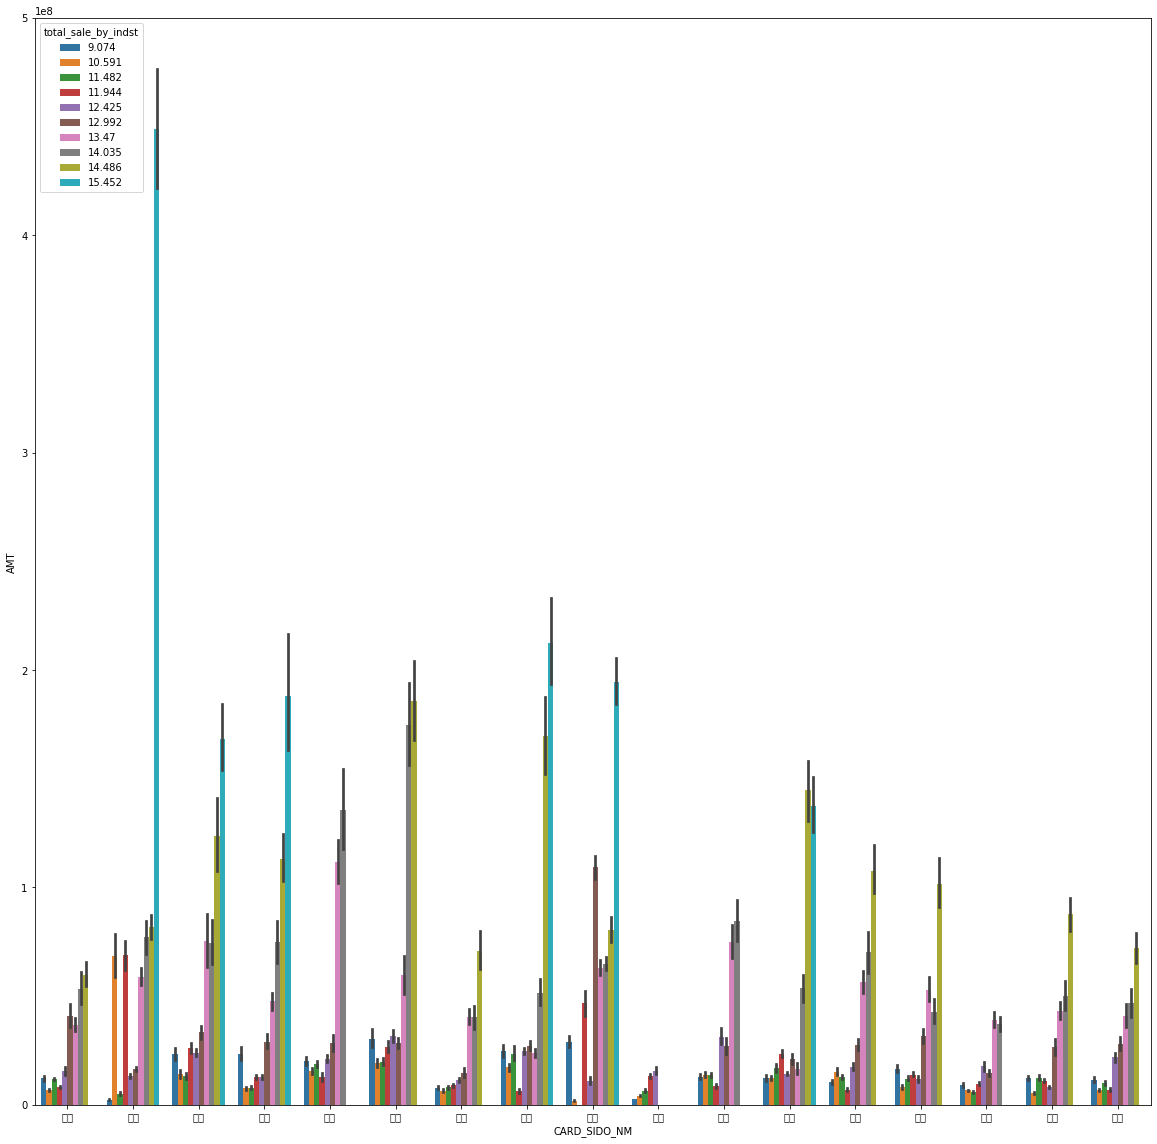

In [135]:
plt.figure(figsize = (20, 20))
sns.barplot(x = in_data["CARD_SIDO_NM"], y = in_data["AMT"], hue = in_data["total_sale_by_indst"])